In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/monikaju/Desktop/train.csv', index_col=0)

In [3]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
Pclass=df['Pclass']

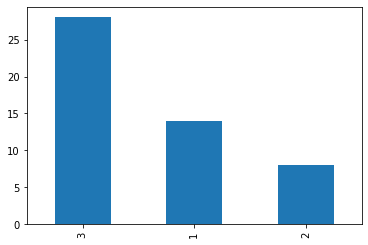

In [5]:
Pclass.sample(50).value_counts().plot.bar()

# Featuring Engineering

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
m = df['Age'].median()
df['Age'].fillna(m, inplace=True)

In [11]:
#Replace missing values with the average age differentiated by Pclass

df['Age'].fillna(df.groupby('Pclass').transform('mean')['Age'], inplace=True)

In [23]:
# Replace with dummies 'Sex'
onehot = pd.get_dummies(df['Sex'])  # --> DF
onehot.head(3)

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0


In [50]:
df2 = pd.concat([df, onehot], axis=1) # <-- concatenate columns
df2.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0


In [25]:
df2.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
female        0
male          0
dtype: int64

In [61]:
df2.shape

(891, 13)

# Logistic Regression

In [51]:
X = df2 [['Pclass','Age','Fare','female','male']]

In [52]:
y= df2 [['Survived']]

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, Y_train, y_test = train_test_split(X, y, random_state=10)

In [58]:
X_train.shape, Y_train.shape

((668, 5), (668, 1))

In [47]:
X_test.shape, y_test.shape

((223, 5), (223, 1))

In [48]:
m = LogisticRegression(random_state=10) 

In [54]:
m.fit(X_train, y_train)

/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
m.coef_

array([[-1.04462993e+00, -2.46996884e-02,  2.60849316e-04,
         1.19769989e+00, -1.19736919e+00]])

In [63]:
m.score(X, y)

0.7946127946127947